In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# figure root
fig_root = '../figures'
save_fig = True

In [3]:
obs_siarea_data = np.load('siarea_MarSep.npz')
obs_time = obs_siarea_data['time']
obs_siarea_n03 = obs_siarea_data['siarea_n03']
obs_siarea_n09 = obs_siarea_data['siarea_n09']
obs_siarea_s03 = obs_siarea_data['siarea_s03']
obs_siarea_s09 = obs_siarea_data['siarea_s09']

In [4]:
e3sm_siarean_dataH = np.load('e3sm_siarean_historical.npz')
e3sm_siareas_dataH = np.load('e3sm_siareas_historical.npz')
e3sm_siarean_dataP = np.load('e3sm_siarean_ssp585.npz')
e3sm_siareas_dataP = np.load('e3sm_siareas_ssp585.npz')
e3sm_siarean = np.concatenate((e3sm_siarean_dataH['data'], e3sm_siarean_dataP['data']), axis=1)
e3sm_siareas = np.concatenate((e3sm_siareas_dataH['data'], e3sm_siareas_dataP['data']), axis=1)
print(e3sm_siarean.shape)
ne3sm = e3sm_siarean.shape[0]

(8, 3000)


In [5]:
esgf_siarean_dataH = np.load('esgf_siarean_historical.npz')
esgf_siarean_dataP = np.load('esgf_siarean_ssp585.npz')
esgf_siareanH = esgf_siarean_dataH['data']
print(esgf_siareanH.shape)
esgf_siareanP = esgf_siarean_dataP['data']
print(esgf_siareanP.shape)
esgf_timeH = esgf_siarean_dataH['time']
esgf_timeP = esgf_siarean_dataP['time']
esgf_siarean_labelH = list(esgf_siarean_dataH['label'])
esgf_siarean_labelP = list(esgf_siarean_dataP['label'])
siarean_label = set(esgf_siarean_labelH).intersection(esgf_siarean_labelP)
print(len(siarean_label))
siarean_label_set = set([lb.split('_')[0] for lb in siarean_label])
print(len(siarean_label_set))
print(siarean_label_set)

(42, 1980)
(22, 1032)
19
13
{'ACCESS-ESM1-5', 'MPI-ESM1-2-LR', 'NorESM2-LM', 'CNRM-CM6-1', 'INM-CM5-0', 'NorESM2-MM', 'MPI-ESM1-2-HR', 'CESM2', 'ACCESS-CM2', 'CESM2-WACCM', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'INM-CM4-8'}


In [6]:
esgf_siareas_dataH = np.load('esgf_siareas_historical.npz')
esgf_siareas_dataP = np.load('esgf_siareas_ssp585.npz')
esgf_siareasH = esgf_siareas_dataH['data']
print(esgf_siareasH.shape)
esgf_siareasP = esgf_siareas_dataP['data']
print(esgf_siareasP.shape)
esgf_siareas_labelH = list(esgf_siareas_dataH['label'])
esgf_siareas_labelP = list(esgf_siareas_dataP['label'])
siareas_label = set(esgf_siareas_labelH).intersection(esgf_siareas_labelP)
print(len(siareas_label))
siareas_label_set = set([lb.split('_')[0] for lb in siareas_label])
print(len(siareas_label_set))
print(siareas_label_set)

(42, 1980)
(22, 1032)
19
13
{'ACCESS-ESM1-5', 'MPI-ESM1-2-LR', 'NorESM2-LM', 'CNRM-CM6-1', 'INM-CM5-0', 'NorESM2-MM', 'MPI-ESM1-2-HR', 'CESM2', 'ACCESS-CM2', 'CESM2-WACCM', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'INM-CM4-8'}


In [7]:
label_intersection = sorted(siarean_label_set.intersection(siareas_label_set))
print(label_intersection)
label_union = sorted(siarean_label_set.union(siareas_label_set))
print(label_union)

['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM']
['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM']


In [8]:
#esgf_colors = np.load('cmip6_colors.npz', allow_pickle=True)['esgf_colors'].flat[0]
cmap = cm.get_cmap('winter')
nmodel = len(label_union)
ifrac = np.linspace(0, 1, nmodel)
esgf_colors = {}
for i in np.arange(nmodel):
    esgf_colors[label_union[i]] = cmap(ifrac[i])

esgf_colors['E3SMv1-0-full'] = 'k'
esgf_colors['E3SMv1-0-GHG'] = 'gray'
esgf_colors['Observation'] = 'r'

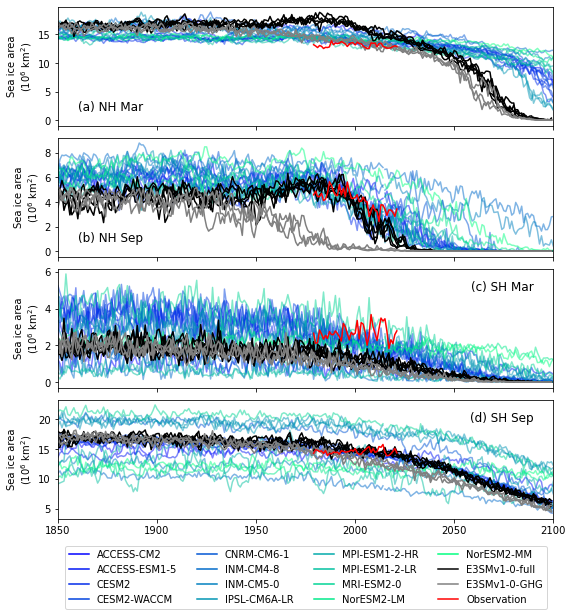

In [9]:
fig, axarr = plt.subplots(4, sharex='col')
fig.set_size_inches([8,9])
models = []
timeH = np.linspace(1850,2014,165)
timeP = np.linspace(2015,2100,86)
e3sm_time = np.linspace(1850,2099,250)
for lb in sorted(siarean_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_siarean_labelH.index(lb)
    axarr[0].plot(timeH, esgf_siareanH[idx,2::12], color=color, alpha=0.5)
    axarr[1].plot(timeH, esgf_siareanH[idx,8::12], color=color, alpha=0.5)
    idx = esgf_siarean_labelP.index(lb)
    axarr[0].plot(timeP, esgf_siareanP[idx,2::12], color=color, alpha=0.5)
    axarr[1].plot(timeP, esgf_siareanP[idx,8::12], color=color, alpha=0.5)

for lb in sorted(siareas_label):
    mname = lb.split('_')[0]
    color = esgf_colors[mname]
    idx = esgf_siareas_labelH.index(lb)
    axarr[2].plot(timeH, esgf_siareasH[idx,2::12], color=color, alpha=0.5)
    axarr[3].plot(timeH, esgf_siareasH[idx,8::12], color=color, alpha=0.5)
    idx = esgf_siareas_labelP.index(lb)
    axarr[2].plot(timeP, esgf_siareasP[idx,2::12], color=color, alpha=0.5)
    axarr[3].plot(timeP, esgf_siareasP[idx,8::12], color=color, alpha=0.5)

for i in np.arange(ne3sm):
    if i <= 4:
        color = 'k'
    else:
        color = 'gray'
    axarr[0].plot(e3sm_time, e3sm_siarean[i,2::12], color=color)
    axarr[1].plot(e3sm_time, e3sm_siarean[i,8::12], color=color)
    axarr[2].plot(e3sm_time, e3sm_siareas[i,2::12], color=color)
    axarr[3].plot(e3sm_time, e3sm_siareas[i,8::12], color=color)
    
for i in np.arange(4):
    axarr[i].set_ylabel('Sea ice area\n($10^6$ km$^2$)')
    axarr[i].set_xlim([1850,2100])

color = esgf_colors['Observation']
axarr[0].plot(obs_time, obs_siarea_n03, color=color)
axarr[1].plot(obs_time, obs_siarea_n09, color=color)
axarr[2].plot(obs_time, obs_siarea_s03, color=color)
axarr[3].plot(obs_time, obs_siarea_s09, color=color)

axarr[0].text(0.04, 0.1, '(a) NH Mar', transform=axarr[0].transAxes, fontsize=12,
              color='k', va='bottom', ha='left')
axarr[1].text(0.04, 0.1, '(b) NH Sep', transform=axarr[1].transAxes, fontsize=12,
              color='k', va='bottom', ha='left')
axarr[2].text(0.96, 0.9, '(c) SH Mar', transform=axarr[2].transAxes, fontsize=12,
              color='k', va='top', ha='right')
axarr[3].text(0.96, 0.9, '(d) SH Sep', transform=axarr[3].transAxes, fontsize=12,
              color='k', va='top', ha='right')

for key in esgf_colors.keys():
    axarr[3].plot(np.nan, np.nan, color=esgf_colors[key], label=key)
axarr[3].legend(loc='lower center',  bbox_to_anchor=(0.5, -0.8), ncol=4)
plt.subplots_adjust(bottom = 0.17, top=0.96, left=0.09, right=0.95, hspace=0.1)

# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceArea.png'
    fig.savefig(figname, dpi = 300)